# Manipulating Molecules with RDKit

In this notebook, we load an "ideal" structure for a ligand obtained by pulling coordinates from the PDB and then we manipulate it using RDKit. 

The approach taken here is manual and hands on. We will pick atoms of interest visually, then morph atomic numbers in order to change a carbon atom into a nitrogen atom, and then add a methyl group by changing a hydrogen atom into a carbon atom.

By loading our molecule from an ideal structure with 3D coordinates, we can ensure that we're already near a "good structure" for our manipulated molecules and our geometry optimization will be more likely to succeed.

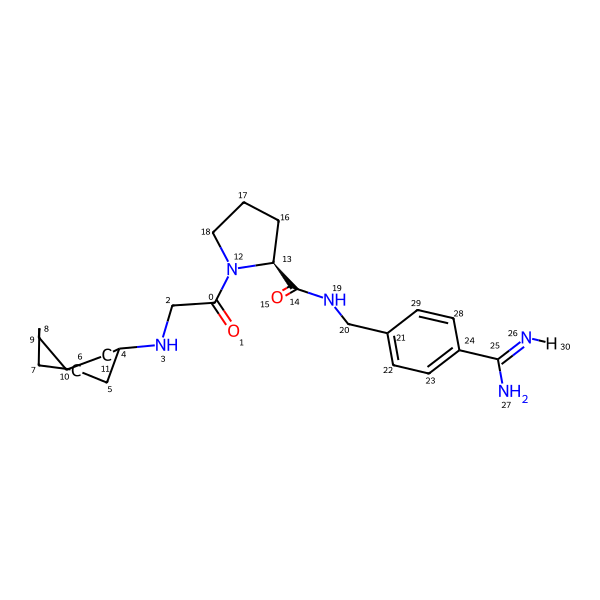

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

# Configuration for displaying in Jupyter notebooks
IPythonConsole.ipython_useSVG = True  # Use SVG for higher quality images
IPythonConsole.drawOptions.addAtomIndices = True  # Show atom indices
IPythonConsole.molSize = 600,600 # Set size of image

ligand = Chem.MolFromMol2File("ligands/13U_ideal.mol2")
ligand

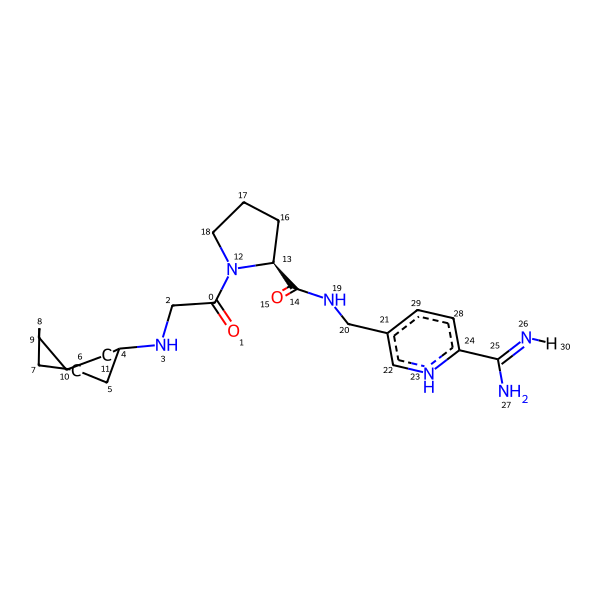

In [2]:
# load another copy to manipulate
mod_ligand_N = Chem.MolFromMol2File("ligands/13U_ideal.mol2")

# change carbon in ring to a nitrogen
mod_ligand_N.GetAtomWithIdx(23).SetAtomicNum(7)

mod_ligand_N

In [3]:
# We can see that the nitrogen we've added has a hydrogen attached to it.
# In order to maintain aromaticity, we need to remove this hydrogen.

atom = mod_ligand_N.GetAtomWithIdx(23) # Get our nitrogen atom
atom.SetNumExplicitHs(0) # Set the number of explicit hydrogens to 0

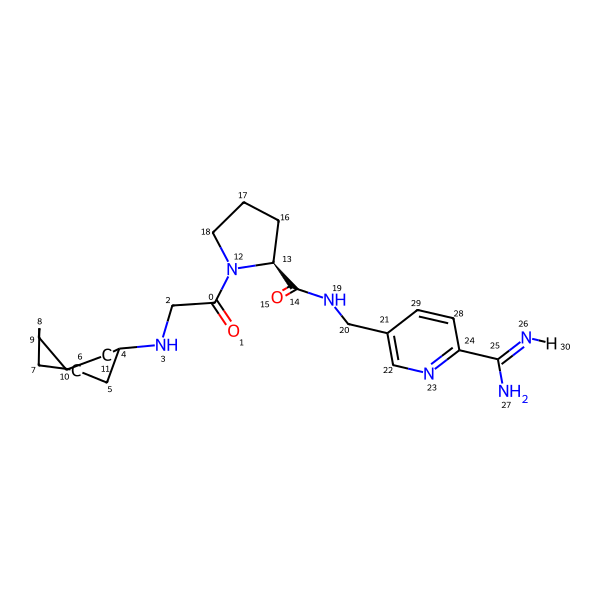

In [4]:
mod_ligand_N

Now we'll perform the same operations, but this time add a methyl group to the ring.
In this notebook, we're going to be tricky an morph the hydrogen on the carbon atom to a carbon atom.
However, a more "standard" way to do this would be to create two molecule fragments and then merge them together.
To be consistent with our above approach, we'll do it the tricky way.

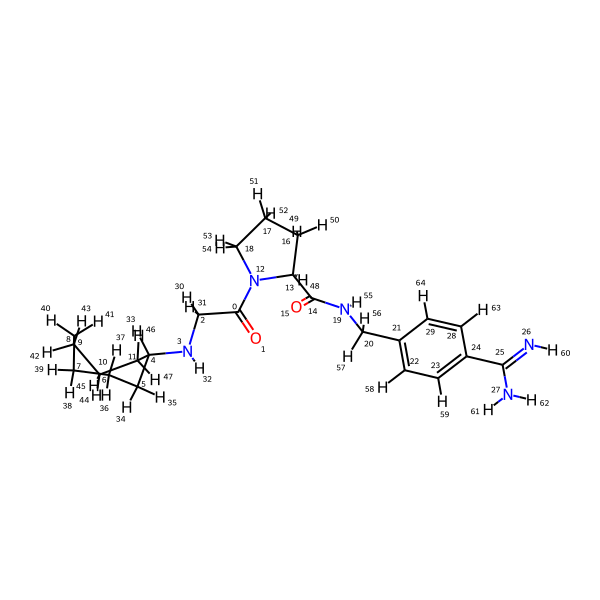

In [5]:
# load the ligand, but keep the hydrogens
mod_ligand_methyl = Chem.MolFromMol2File("ligands/13U_ideal.mol2", removeHs=False)
mod_ligand_methyl

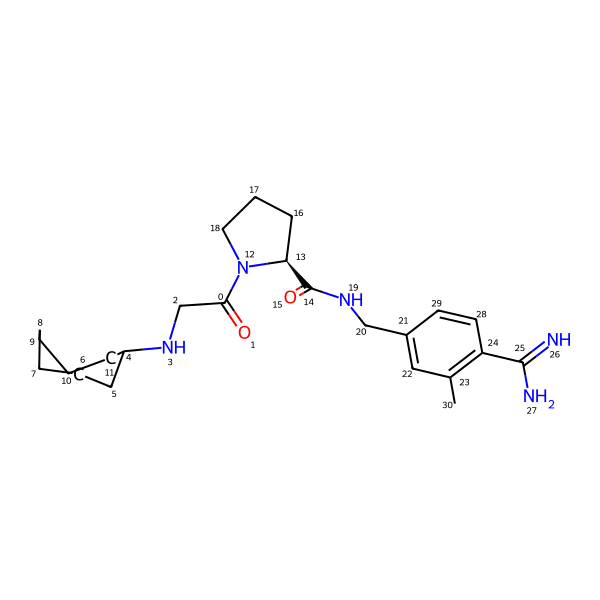

In [6]:
# Get the atom we want to change - look at image to see we want to morph atom 59
atom = mod_ligand_methyl.GetAtomWithIdx(59)

atom.SetAtomicNum(6) # Change the atom to carbon
atom.SetNumExplicitHs(3) # Add 3 explicit hydrogens to the carbon

mod_ligand_methyl = Chem.RemoveAllHs(mod_ligand_methyl) # Remove the H's for viewing
mod_ligand_methyl

Now that we have our manipulated molecules, we'll optimize them using RDKit and save them.

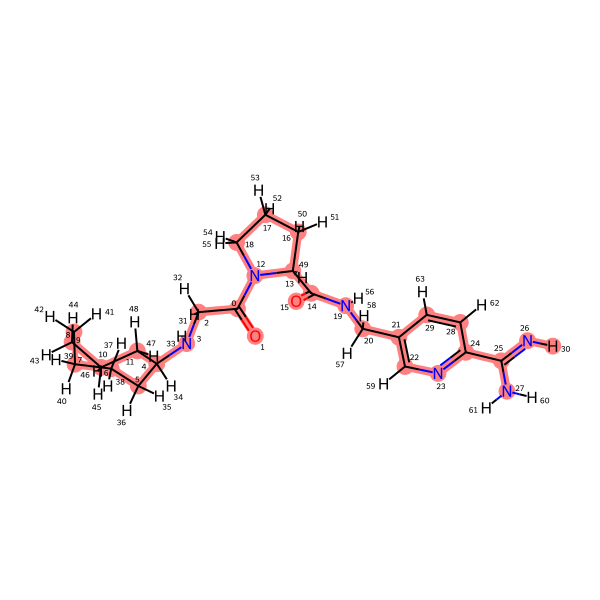

In [7]:
# Optimize new molecules and save
from rdkit.Chem import AllChem

mod_ligand_NH = Chem.AddHs(mod_ligand_N)

# Do a constrained embedding to keep the ligand in the same position
# this allows for the hydrogens to be added in reasonable locations, but keeps
# the heavy atoms in the same position
# See https://rdkit.org/docs/source/rdkit.Chem.AllChem.html#rdkit.Chem.AllChem.ConstrainedEmbed
constrained_mol = AllChem.ConstrainedEmbed(mod_ligand_NH, mod_ligand_N, useTethers=True)
constrained_mol

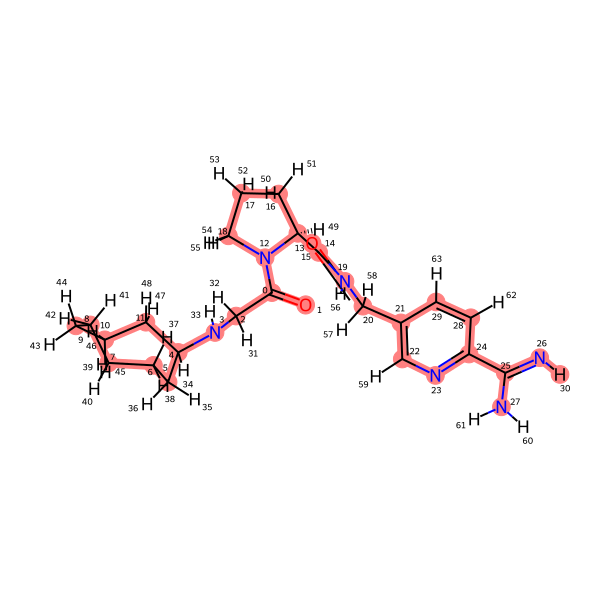

In [8]:
# Perform geometry optimization
opt_N = AllChem.MMFFOptimizeMolecule(mod_ligand_NH)
mod_ligand_NH

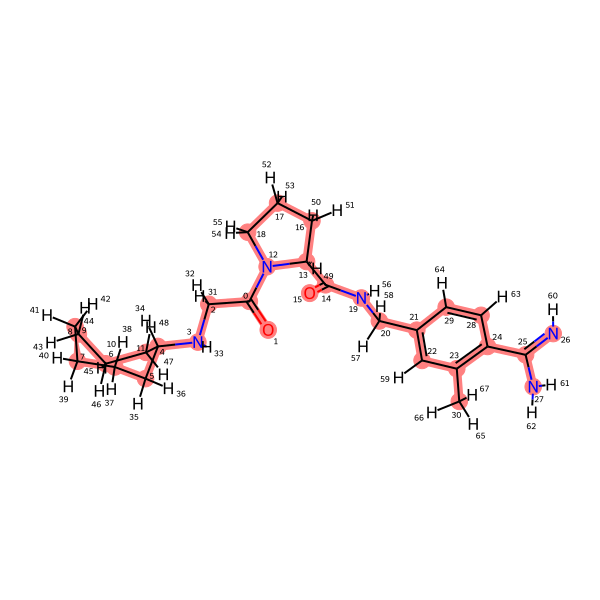

In [9]:
# Repeat process on methyl ligand

mod_ligand_methylH = Chem.AddHs(mod_ligand_methyl)

constrained_mol = AllChem.ConstrainedEmbed(mod_ligand_methylH, mod_ligand_methyl, useTethers=True)
constrained_mol

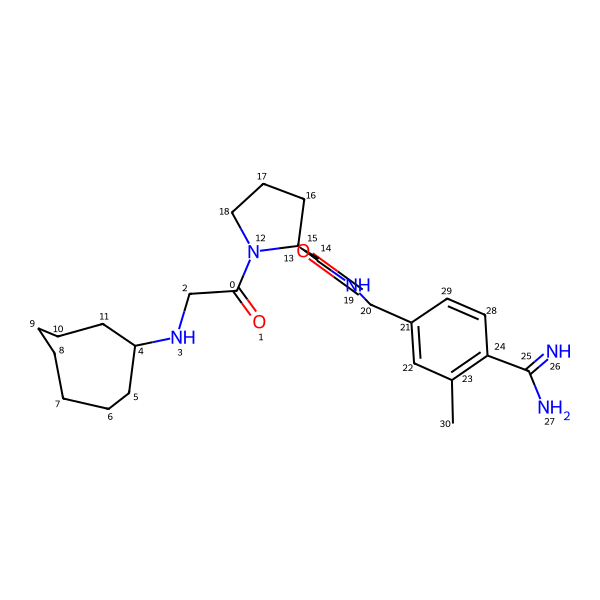

In [10]:
opt_methyl = AllChem.MMFFOptimizeMoleculeConfs(mod_ligand_methylH)
Chem.RemoveAllHs(mod_ligand_methylH)

In [ ]:
# save to new files
import os

# make modified ligand directory
os.makedirs("ligands_modified", exist_ok=True)

# save modified ligands xyz

Chem.MolToXYZFile(mod_ligand_NH, 'ligands_modified/13U_modified_N.xyz')

Chem.MolToXYZFile(mod_ligand_methylH, 'ligands_modified/13U_modified_methyl.xyz')